# **Credit-Card-Approvals**

## **Overview**

A credit card is a financial tool issued by banks or financial institutions that allows the cardholder to borrow funds to make purchases, pay for services, or withdraw cash up to a certain credit limit. Credit Card Approvals is the process by which a bank or financial institution evaluates a person's credit-worthiness to decide whether or not to approve their application for a credit card.

#### **Data Description**
The dataset comprises two main files, `Credit_card.csv` and `Credit_card_label.csv`, which together provide detailed information about credit card applicants and the outcomes of their applications. This dataset provides a comprehensive overview of the applicant's demographic, financial, and employment information, which can be used to analyze factors affecting credit card approval decisions. Below is a description of each feature in the datasets:

##### 1. **`Credit_card.csv`**
- `Ind_ID`: Unique identifier for each client.
- `Gender`: Gender of the applicant (e.g., Male, Female).
- `Car_owner`: Indicates whether the applicant owns a car (Yes/No).
- `Propert_owner`: Indicates whether the applicant owns property (Yes/No).
- `Children`: The number of children the applicant has.
- `Annual_income`: The annual income of the applicant.
- `Type_Income`: Type of income the applicant receives (e.g., Salary, Pension, Business).
- `Education`: The highest level of education attained by the applicant (e.g., High School, Bachelor’s, Master’s).
- `Marital_status`: The marital status of the applicant (e.g., Single, Married, Divorced).
- `Housing_type`: The applicant’s living situation (e.g., Renting, Homeowner, Living with parents).
- `Birthday_count`: The applicant's age represented as the backward count of days from the current day (0 means today, -1 means yesterday, etc.).
- `Employed_days`: The number of days since the applicant started their current employment, represented as a backward count from the current day (0 means today, positive values indicate the applicant is currently unemployed).
- `Mobile_phone`: Indicates whether the applicant has a mobile phone (Yes/No).
- `Work_phone`: Indicates whether the applicant has a work phone (Yes/No).
- `Phone`: Indicates whether the applicant has any phone number (Yes/No).
- `EMAIL_ID`: Indicates whether the applicant has an email address (Yes/No).
- `Type_Occupation`: The occupation type of the applicant (e.g., Manager, Sales, Laborer).
- `Family_Members`: The size of the applicant's family, including themselves.

##### 2. **`Credit_card_label.csv`**
- `ID`: The unique identifier (Ind_ID) used to join with the application data in the Credit_Card.csv file.
- `Label`: The outcome of the credit card application, where 0 indicates the application was approved, and 1 indicates it was rejected.

<a id="cont"></a>

## Table of Contents

- [1. Import Packages](#one)
- [2. Load Data](#two)
- [3. Exploratory Data Analysis (EDA)](#three)
- [4. Feature Engineering](#four)
- [5. Modeling](#five)
- [6. Model Explanation](#six)
- [7. Model Evaluation](#seven)
- [8. Model Deployment](#eight)
- [9. Conclusion](#nine)

<a id="one"></a>
# 1. Import Packages
[Back to Table of Contents](#cont)

---

In [218]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import joblib

<a id="two"></a>
# 2. Load Data
[Back to Table of Contents](#cont)

---

In [219]:
data = pd.read_csv("/Users/user/Downloads/dataset/Credit_card.csv")

In [220]:
label = pd.read_csv("/Users/user/Downloads/dataset/Credit_card_label.csv")

<a id="three"></a>
# 3. Exploratory Data Analysis (EDA)
[Back to Table of Contents](#cont)

---

### 3.1 Dataset Overview

In [221]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


- The dataset consisting of various background information about the applicant. 

In [222]:
label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


- The dataset consisting of the labels of whether the credit card application was approved or not.

In [223]:
# Merge the two dataset files 
data = data.merge(label, on="Ind_ID", how="left")

In [224]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [225]:
# Display basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [226]:
# Display descriptive statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
CHILDREN,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
Annual_income,1525.0,1.913993e+05,113252.997656,33750.0,121500.00,166500.0,225000.00,1575000.0
Birthday_count,1526.0,-1.604034e+04,4229.503202,-24946.0,-19553.00,-15661.5,-12417.00,-7705.0
Employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
Mobile_phone,1548.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
Work_Phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
Phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
EMAIL_ID,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
Family_Members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0


### 3.2 Data Cleaning

In [227]:
# Check for missing values in the data
data.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

- `Type_Occupation` is the column with the most missing values (488 entries) followed by `Annual_income` with 23 entries, `Birthday_count` with 22 entries, and `Gender` with 7 entries. 

In [228]:
data.drop("Type_Occupation", axis=1, inplace=True)

In [229]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label'],
      dtype='object')

- The `Type_Occupation` column consisting of the type of occupation the applicant does has been successfully dropped due to having a high count of missing values.   

In [230]:
data.dropna(inplace=True)

In [231]:
data.isna().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Mobile_phone      0
Work_Phone        0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

- All the rows consisting of missing values in the columns(`Annual_income`, `Birthday_count` and `Gender`) have been successfully dropped to ensure that our dataset remains accurate, consistent, and reliable for further analysis. 

In [232]:
data.duplicated().sum()

0

- There seems to be no duplicated values in our dataset therefore implies that each entity in our dataset is only represented once and that our data is accurate, consistent and reliable for further analysis.

### Data Exploration & Visualization

##### Annual Income by Gender

In [233]:
gender_income = data.groupby("GENDER")["Annual_income"].mean()
gender_income.sort_values(ascending=False)

GENDER
M    222485.245902
F    172391.840021
Name: Annual_income, dtype: float64

Text(0, 0.5, 'Salary')

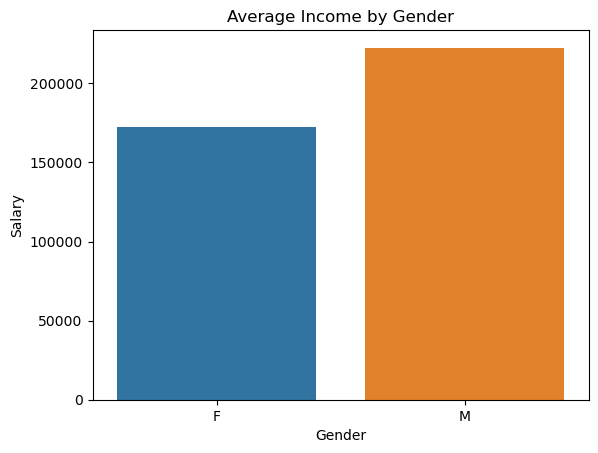

In [234]:
sns.barplot(x=gender_income.index, y=gender_income.values)
plt.title("Average Income by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")

- Males(`M`) are seen to be earning higher than Females(`F`) annually. 

##### Count of Labels

In [235]:
label_counts = data["label"].value_counts()
label_counts

label
0    1336
1     160
Name: count, dtype: int64

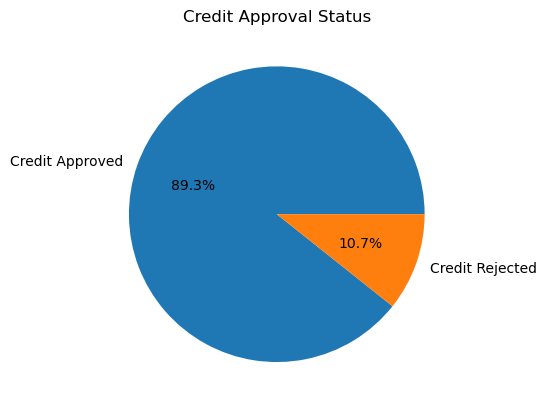

In [236]:
plt.pie(label_counts, labels=["Credit Approved", "Credit Rejected"],autopct="%1.1f%%")
plt.title("Credit Approval Status")
plt.show()

- Our dataset has a class imbalance as there is a higher count of credit card approvals as compared to credit card rejections which may lead to a biased model performance.

##### Salary by Type of Income

In [237]:
applicant_income = data.groupby("Type_Income")["Annual_income"].mean()
applicant_income

Type_Income
Commercial associate    233880.169972
Pensioner               154964.866795
State servant           210130.434783
Working                 180154.579974
Name: Annual_income, dtype: float64

Text(0, 0.5, 'Salary')

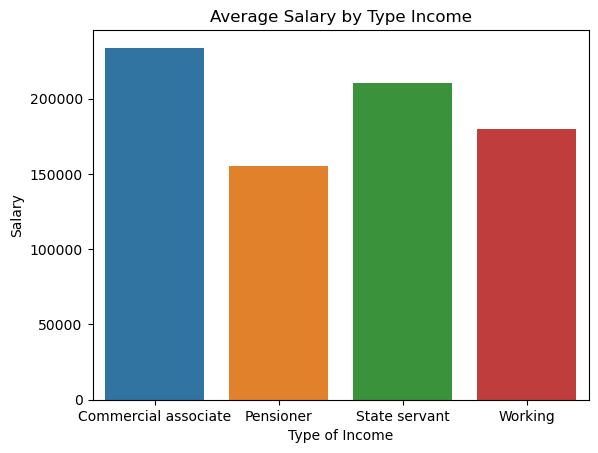

In [238]:
sns.barplot(x=applicant_income.index, y=applicant_income.values)
plt.title("Average Salary by Type Income")
plt.xlabel("Type of Income")
plt.ylabel("Salary")

- `Commercial associate` group earns the highest salary annually whereas `Pensior` is the lowest earning salary group.

##### Count of Applicants by Housing Type

In [239]:
family_members = data.groupby("Housing_type")["Family_Members"].sum()
family_members

Housing_type
Co-op apartment           5
House / apartment      2900
Municipal apartment      92
Office apartment         21
Rented apartment         46
With parents            175
Name: Family_Members, dtype: int64

Text(0, 0.5, 'Count of Applicants')

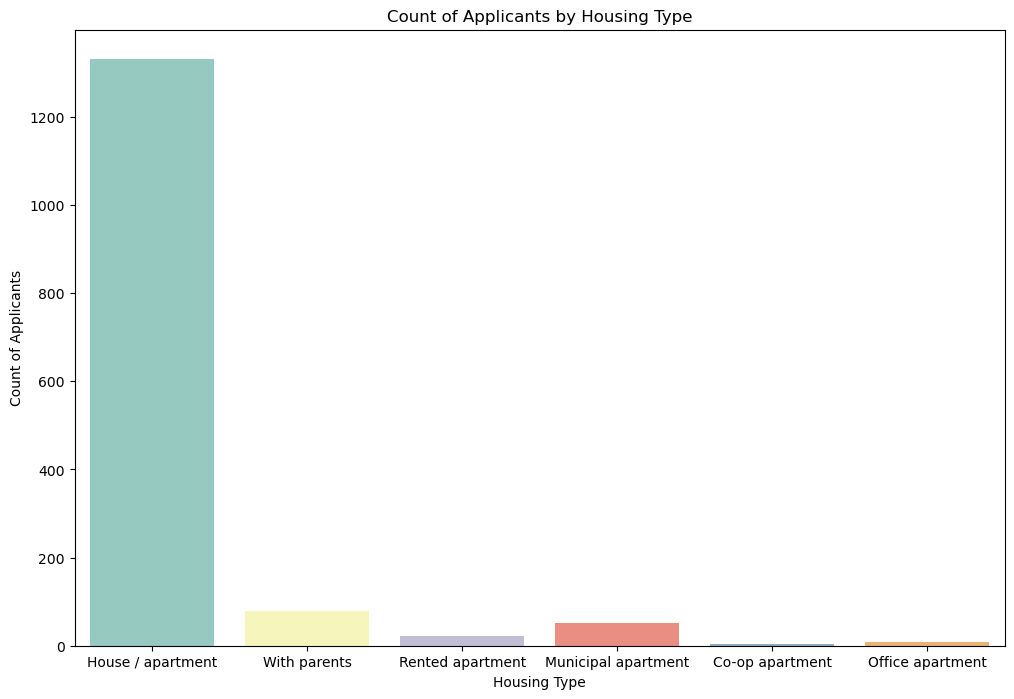

In [240]:
plt.figure(figsize=(12, 8))
sns.countplot(x="Housing_type",data=data, palette="Set3")
plt.title("Count of Applicants by Housing Type")
plt.xlabel("Housing Type")
plt.ylabel("Count of Applicants")

- `House / apartment` owners group have the highest count of credit card applicants whereas applicants with `co-op apartment` are the group with the lowest credit card applicants.

##### Count of Property Status by Annual Income

In [241]:
average_property = data.groupby("Propert_Owner")["Annual_income"].mean()
average_property

Propert_Owner
N    183343.352601
Y    194722.899181
Name: Annual_income, dtype: float64

- On average, more credit card applicants are property owners.

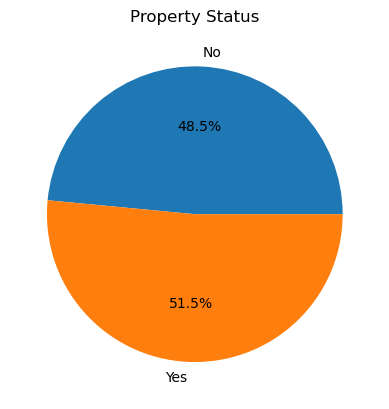

In [242]:
plt.pie(average_property, labels=["No", "Yes"],autopct="%1.1f%%")
plt.title("Property Status")
plt.show()

##### Annual Income Variation by Marital Status

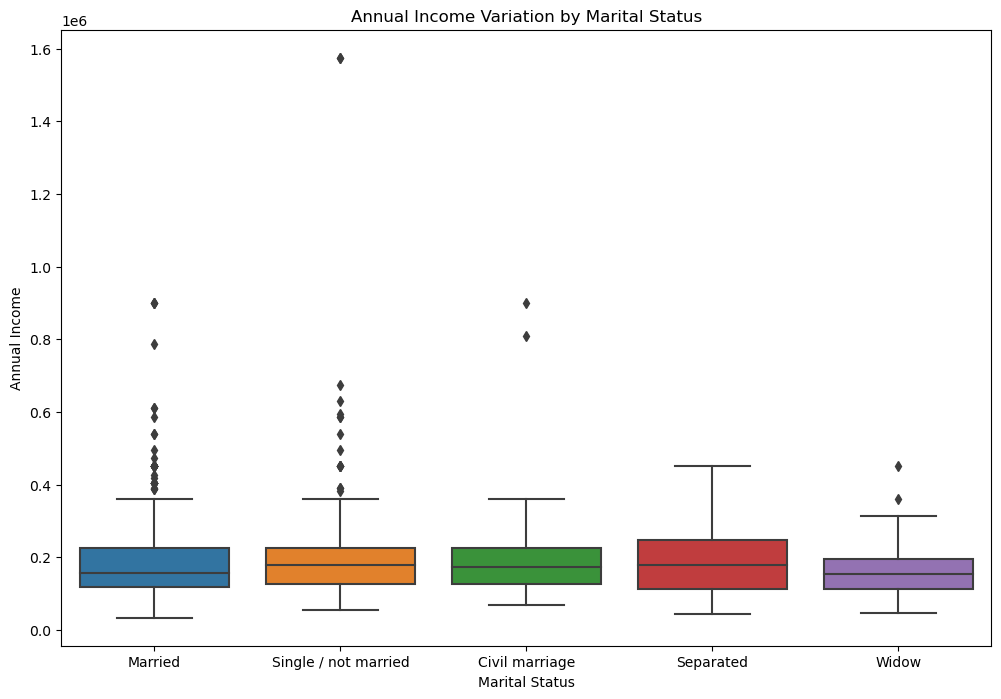

In [243]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Marital_status", y="Annual_income", data=data)
plt.title("Annual Income Variation by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Annual Income")
plt.show()

In [244]:
car_owner_count = data["Car_Owner"].value_counts()
car_owner_count

Car_Owner
N    898
Y    598
Name: count, dtype: int64

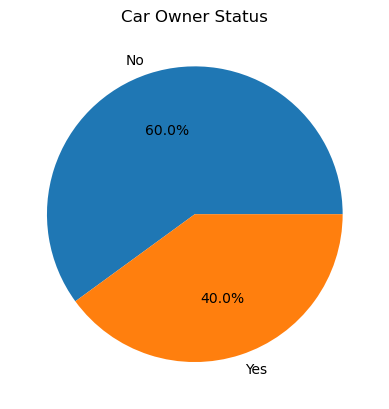

In [245]:
plt.pie(car_owner_count, labels=["No", "Yes"],autopct="%1.1f%%")
plt.title("Car Owner Status")
plt.show()

- Majority of the applicants (`60%`) who request for credit cards do not own cars.

##### Count of Family Members by Marital Status

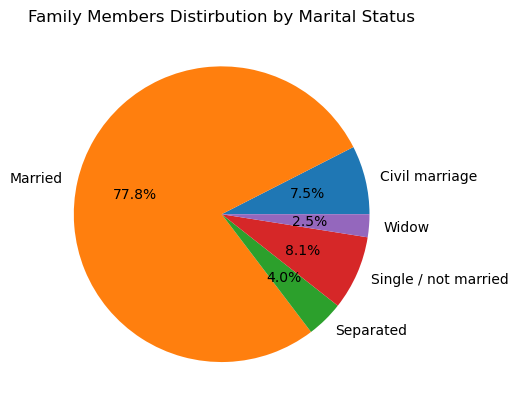

In [246]:
data.groupby("Marital_status")["Family_Members"].sum().plot(kind="pie", autopct="%1.1f%%")
plt.title("Family Members Distirbution by Marital Status")
plt.ylabel("")
plt.show()

- Applicants who are married (`77.8%`) seem to have a higher count of family members as compared to those who are widowed(`2.5%`).

<a id="four"></a>
# 4. Feature Engineering
[Back to Table of Contents](#cont)

---

##### 4.1 Feature Selection

In [247]:
data = data[["Car_Owner", "Propert_Owner", "Annual_income", "EDUCATION", "label"]]
data

,Car_Owner,Propert_Owner,Annual_income,EDUCATION,label
0,Y,Y,180000.0,Higher education,1
1,Y,N,315000.0,Higher education,1
4,Y,N,315000.0,Higher education,1
6,Y,N,315000.0,Higher education,1
7,N,N,180000.0,Secondary / secondary special,1
...,...,...,...,...,...
1542,Y,N,360000.0,Secondary / secondary special,0
1544,N,N,225000.0,Incomplete higher,0
1545,Y,Y,180000.0,Higher education,0
1546,Y,N,270000.0,Secondary / secondary special,0


In [248]:
# Label-Encoding
labelencoder = preprocessing.LabelEncoder()

In [249]:
data["Car_Owner"] = labelencoder.fit_transform(data["Car_Owner"])
data["Propert_Owner"] = labelencoder.fit_transform(data["Propert_Owner"])
data["EDUCATION"] = labelencoder.fit_transform(data["EDUCATION"])

- Converted these columns into numeric data types using label encoding as model can only process numeric data for training and testing.

##### 4.2 Split Dataset

In [250]:
X = data.iloc[:, : -1]

In [251]:
y = data.iloc[:, -1]

- Split the data into X (`Car_Owner`, `Proert_Owner` and `EDUCATION`) the independent variable and y (`label`) as the dependent variable (target variable). 

In [252]:
# Split dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### 4.3 Feature Scaling

In [253]:
# Transforms the data into standardized format
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

- Feature Scaling is crucial as it will impact the performance of our model by speeding up its training process and leading to improved results.

<a id="five"></a>
# 5. Modeling
[Back to Table of Contents](#cont)

---

In [254]:
# Universal Function that be used with all machine learning models.
model_df = {}
def model_evaluation(model, X, y):
    model.fit(scaled_X_train, y_train)

    # Evaluate the model on the scaled test data
    accuracy = model.score(scaled_X_test, y_test)
    print(f"The accuracy score of the {model} model is {accuracy}")

    # Perform cross-validation with the scaled data
    cross_val_scores = cross_val_score(model, scaler.fit_transform(X), y)
    avg_cross_val_score = np.mean(cross_val_scores)
    print(f"The average cross-validation score for the {model} model is {avg_cross_val_score}")

    # Store the cross-validation score in the model_df dictionary
    model_df[model] = round(avg_cross_val_score * 100, 2)

In [255]:
def model_performance(predictions):
    print(f"Accuracy score of the model is {accuracy_score(y_test, predictions)}")

##### Random Forest Classifier

In [256]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier()
model_evaluation(rfc_model, X, y)


The accuracy score of the RandomForestClassifier() model is 0.8666666666666667
The average cross-validation score for the RandomForestClassifier() model is 0.8736588628762542


In [257]:
rfc = rfc_model.predict(scaled_X_test)

In [258]:
model_performance(rfc)

Accuracy score of the model is 0.8666666666666667


With parameters 

In [259]:
rfc_model_two = RandomForestClassifier()
n_estimators = [32, 64, 128, 256]
max_features = [2,3,4]
bootstrap = [True,  False]
oob_score = [True, False]

In [260]:
param_grid_rfc_two = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "bootstrap": bootstrap,
    "oob_score": oob_score
}

In [261]:
grid_rfc = GridSearchCV(rfc_model_two, param_grid_rfc_two)

In [262]:
grid_rfc.fit(scaled_X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\Roaming\Python\Python311\site-pack

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [263]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 128, 'oob_score': True}

In [264]:
pred_rfc_two = grid_rfc.predict(scaled_X_test)

In [265]:
model_performance(pred_rfc_two)

Accuracy score of the model is 0.88


##### Logistic Regression 

In [266]:
log_model = LogisticRegression()
model_evaluation(log_model, X, y)

The accuracy score of the LogisticRegression() model is 0.8966666666666666
The average cross-validation score for the LogisticRegression() model is 0.8930479375696766


In [267]:
log_predictions = log_model.predict(scaled_X_test)

In [268]:
model_performance(log_predictions)

Accuracy score of the model is 0.8966666666666666


##### GridSearchCV

In [269]:
param_grid = {"n_neighbors" : [3,5,7,9,11],
              "weights": ["uniform","distance"],
              "algorithm": ["auto", "kd_tree"]}

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)

In [270]:
gridkn.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [271]:
gridkn.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}

In [272]:
kn_preds = gridkn.predict(scaled_X_test)

In [273]:
model_evaluation(gridkn, X,y)

The accuracy score of the GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']}) model is 0.8966666666666666
The average cross-validation score for the GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']}) model is 0.8910457079152732


In [274]:
model_performance(kn_preds)

Accuracy score of the model is 0.8966666666666666


##### SVC

In [275]:
svm = SVC()
param_grid_svr = {"C": [0.01, 0.1, 0.5, 1],
                  "kernel": ["linear", "rbf", "poly"]}
gridsvr = GridSearchCV(svm, param_grid_svr)

In [276]:
gridsvr.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [277]:
pred_svc = gridsvr.predict(scaled_X_test)

In [278]:
model_evaluation(gridsvr, X, y)

The accuracy score of the GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']}) model is 0.8966666666666666
The average cross-validation score for the GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']}) model is 0.8930479375696766


In [279]:
model_performance(pred_svc)

Accuracy score of the model is 0.8966666666666666


##### Decision Tree Classfier

In [280]:
param_grid = {
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth": [None, 10, 20,30,40,50],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid)

In [281]:
grid_search_tree.fit(scaled_X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [282]:
grid_search_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [283]:
grid_pred = grid_search_tree.predict(scaled_X_test)

In [284]:
model_performance(grid_pred)

Accuracy score of the model is 0.8966666666666666


##### ADA Boost Classfier

In [285]:
ada_classifier = AdaBoostClassifier()
ada_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1, 10]
}
ada_grid_search = GridSearchCV(ada_classifier, ada_param_grid, cv=2)

In [286]:
ada_grid_search.fit(scaled_X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 200]})

In [287]:
ada_pred = ada_grid_search.predict(scaled_X_test)

In [288]:
model_performance(ada_pred)

Accuracy score of the model is 0.8966666666666666


##### XGBoost Classifier

In [289]:
xgb_classifier = XGBClassifier()
xgb_param_grid = {
    "n_estimators": [60,80,100, 500, 1000],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth": [4,5,7]
}

In [290]:
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_param_grid, cv=8)

In [291]:
xgb_grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=8,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 7],
                         'n_estimators': [60, 80, 100, 500, 1000]})

In [292]:
xgb_grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 60}

In [293]:
xgb_pred = xgb_grid_search.predict(scaled_X_test)

In [294]:
model_performance(xgb_pred)

Accuracy score of the model is 0.8966666666666666
